In [6]:
#lets start with some imports

#Py-ART, simply the best sowftware around.. Give those guys a grant
import pyart
#timezone info
import pytz

#plotting
from matplotlib import pyplot as plt

#plotting on a maop
import cartopy

import xarray as xr
import os
import copy

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
#matplotlib qt
%matplotlib inline

In [2]:
ddir = '/data/utqiagvik/'
radar = pyart.io.read('/data/utqiagvik/BRW190121084803.RAWTA7Z.maint')
print(radar.longitude, radar.latitude)
#71.3252729,-156.6715376
radar.longitude['data'] = radar.longitude['data'] -0.06
print(radar.longitude, radar.latitude)

{'long_name': 'Longitude', 'standard_name': 'Longitude', 'units': 'degrees_east', 'data': array([-156.66763997])} {'long_name': 'Latitude', 'standard_name': 'Latitude', 'units': 'degrees_north', 'data': array([71.32481011])}
{'long_name': 'Longitude', 'standard_name': 'Longitude', 'units': 'degrees_east', 'data': array([-156.72763997])} {'long_name': 'Latitude', 'standard_name': 'Latitude', 'units': 'degrees_north', 'data': array([71.32481011])}


In [4]:
rlat = radar.latitude['data'][0]
rlon = radar.longitude['data'][0]
sweep = 0

#Get the date at the start of collection
index_at_start = radar.sweep_start_ray_index['data'][sweep]
time_at_start_of_radar = pyart.io.cfradial.netCDF4.num2date(radar.time['data'][index_at_start], 
                                  radar.time['units'])

#make a nice time stamp
pacific = pytz.timezone('US/Alaska')
local_time = pacific.fromutc(time_at_start_of_radar)
fancy_date_string = local_time.strftime('%A %B %d at %I:%M %p %Z')
print(fancy_date_string)

Sunday January 20 at 11:48 PM AKST


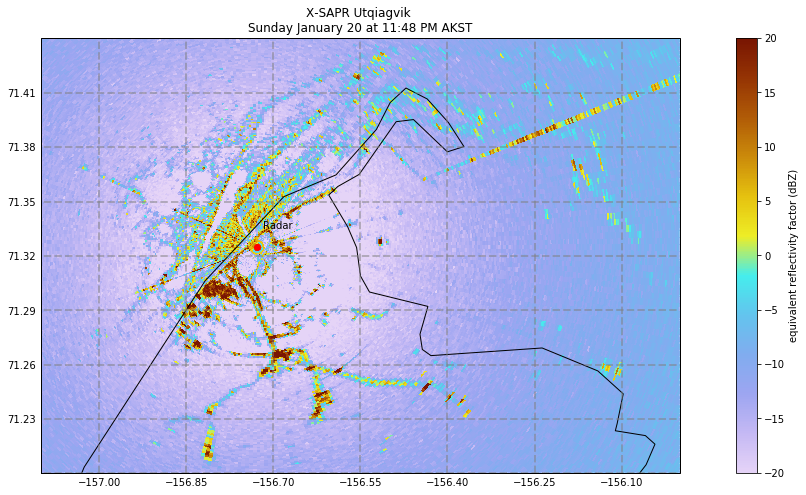

In [5]:
#Set up our figure
fig = plt.figure(figsize = [20,8])

#create a Cartopy Py-ART display object
display = pyart.graph.RadarMapDisplay(radar)

#get center of the display for the projection
lat_0 = rlat
lon_0 = rlon*-1

# Main difference from Basemap! 
#Cartopy forces you to select a projection first!
projection = cartopy.crs.Mercator(
                central_longitude=lon_0,
                min_latitude=rlat-5., max_latitude=rlat+5.)

title = 'X-SAPR Utqiagvik \n' + fancy_date_string

#plot a PPI! add coastline at 10m resolution
display.plot_ppi_map(
    'reflectivity', sweep, colorbar_flag=True,
    title=title, resolution='10m',
    projection=projection, 
    cmap=pyart.graph.cm.LangRainbow12,
    vmin=-20, vmax=20, min_lon=-157.1, 
    min_lat=71.2, max_lon=-156, max_lat=71.44 )

#plt.gca().coastlines(resolution='10m', color='black', linewidth=1)


# Mark the radar
display.plot_point(lon_0*-1, lat_0, label_text='Radar')

# Plot some lat and lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

fnamestr = local_time.strftime('/data/utqiagvik/xsaprimg-%Y%m%d-%H%M.jpg')
plt.savefig(fnamestr)

In [23]:
ranges = copy.deepcopy(radar.fields['reflectivity'])
azs = copy.deepcopy(radar.fields['reflectivity'])




In [33]:
#use matrix multplication to make 2d azimuth array
azplus1 = np.expand_dims(radar.azimuth['data'], axis=0).T
print(azplus1.shape)
rangeplus1 = np.expand_dims(radar.range['data']*0.0 + 1., axis=0)
print(rangeplus1.shape)
az_2d = np.matmul(azplus1, rangeplus1)

#use matrix multplication to make 2d range array
azplus1 = np.expand_dims(radar.azimuth['data']*0.0 + 1., axis=0).T
print(azplus1.shape)
rangeplus1 = np.expand_dims(radar.range['data'], axis=0)
print(rangeplus1.shape)
r_2d = np.matmul(azplus1, rangeplus1)


(6480, 1)
(1, 1001)
(6480, 1)
(1, 1001)


In [34]:
print(az_2d.shape)
print(radar.fields['reflectivity']['data'].shape)

ranges['data'] = r_2d
azs['data'] = az_2d

(6480, 1001)
(6480, 1001)


In [35]:
radar.add_field('range2d', ranges, replace_existing=True)
radar.add_field('az2d', azs, replace_existing=True)


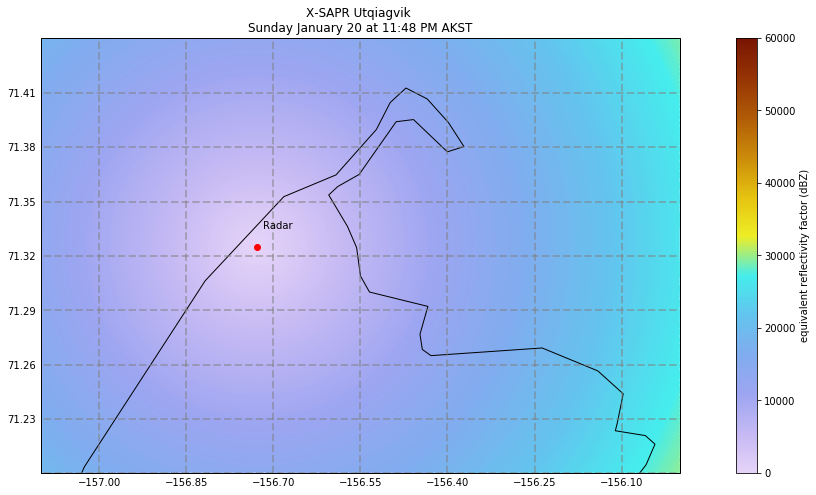

In [36]:
#Set up our figure
fig = plt.figure(figsize = [20,8])

#create a Cartopy Py-ART display object
display = pyart.graph.RadarMapDisplay(radar)

#get center of the display for the projection
lat_0 = rlat
lon_0 = rlon*-1

# Main difference from Basemap! 
#Cartopy forces you to select a projection first!
projection = cartopy.crs.Mercator(
                central_longitude=lon_0,
                min_latitude=rlat-5., max_latitude=rlat+5.)

title = 'X-SAPR Utqiagvik \n' + fancy_date_string

#plot a PPI! add coastline at 10m resolution
display.plot_ppi_map(
    'range2d', sweep, colorbar_flag=True,
    title=title, resolution='10m',
    projection=projection, 
    cmap=pyart.graph.cm.LangRainbow12,
    vmin=0, vmax=60*1000, min_lon=-157.1, 
    min_lat=71.2, max_lon=-156, max_lat=71.44 )

#plt.gca().coastlines(resolution='10m', color='black', linewidth=1)


# Mark the radar
display.plot_point(lon_0*-1, lat_0, label_text='Radar')

# Plot some lat and lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

fnamestr = local_time.strftime('/data/utqiagvik/xsaprimg-%Y%m%d-%H%M.jpg')
plt.savefig(fnamestr)

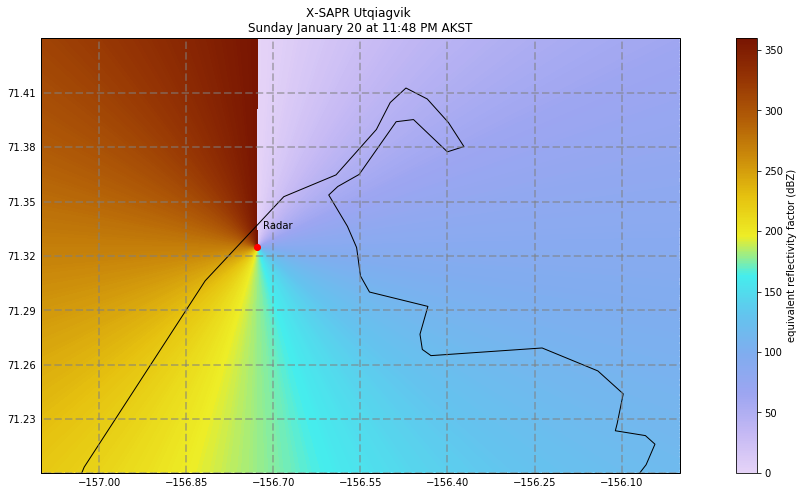

In [38]:
#Set up our figure
fig = plt.figure(figsize = [20,8])

#create a Cartopy Py-ART display object
display = pyart.graph.RadarMapDisplay(radar)

#get center of the display for the projection
lat_0 = rlat
lon_0 = rlon*-1

# Main difference from Basemap! 
#Cartopy forces you to select a projection first!
projection = cartopy.crs.Mercator(
                central_longitude=lon_0,
                min_latitude=rlat-5., max_latitude=rlat+5.)

title = 'X-SAPR Utqiagvik \n' + fancy_date_string

#plot a PPI! add coastline at 10m resolution
display.plot_ppi_map(
    'az2d', sweep, colorbar_flag=True,
    title=title, resolution='10m',
    projection=projection, 
    cmap=pyart.graph.cm.LangRainbow12,
    vmin=0, vmax=360, min_lon=-157.1, 
    min_lat=71.2, max_lon=-156, max_lat=71.44 )

#plt.gca().coastlines(resolution='10m', color='black', linewidth=1)


# Mark the radar
display.plot_point(lon_0*-1, lat_0, label_text='Radar')

# Plot some lat and lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

fnamestr = local_time.strftime('/data/utqiagvik/xsaprimg-%Y%m%d-%H%M.jpg')
plt.savefig(fnamestr)

In [50]:
mygf = pyart.filters.GateFilter(radar)
mygf.exclude_all()
mygf.include_inside('az2d', 250,360)
mygf.include_inside('az2d', 0,30)
mygf.exclude_above('range2d', 8*1000.)
mygf.exclude_below('range2d', 2*1000.)


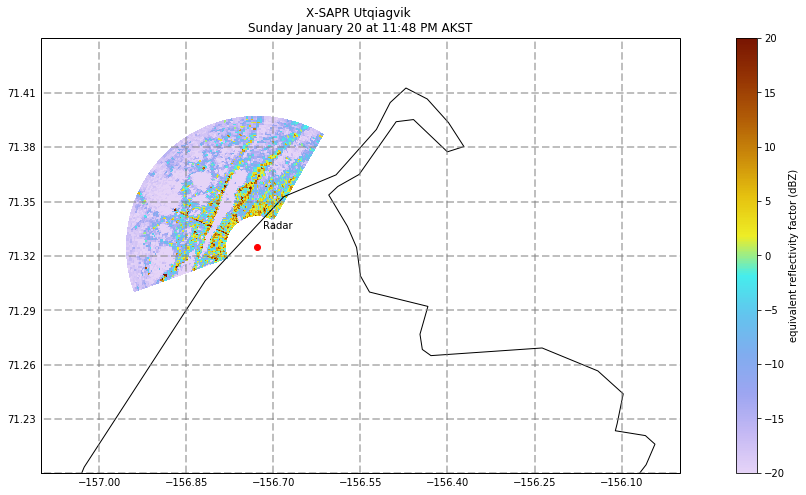

In [51]:
#Set up our figure
fig = plt.figure(figsize = [20,8])

#create a Cartopy Py-ART display object
display = pyart.graph.RadarMapDisplay(radar)

#get center of the display for the projection
lat_0 = rlat
lon_0 = rlon*-1

# Main difference from Basemap! 
#Cartopy forces you to select a projection first!
projection = cartopy.crs.Mercator(
                central_longitude=lon_0,
                min_latitude=rlat-5., max_latitude=rlat+5.)

title = 'X-SAPR Utqiagvik \n' + fancy_date_string

#plot a PPI! add coastline at 10m resolution
display.plot_ppi_map(
    'reflectivity', sweep, colorbar_flag=True,
    title=title, resolution='10m',
    projection=projection, 
    cmap=pyart.graph.cm.LangRainbow12,
    vmin=-20, vmax=20, min_lon=-157.1, 
    min_lat=71.2, max_lon=-156, max_lat=71.44,
    gatefilter = mygf)

#plt.gca().coastlines(resolution='10m', color='black', linewidth=1)


# Mark the radar
display.plot_point(lon_0*-1, lat_0, label_text='Radar')

# Plot some lat and lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

fnamestr = local_time.strftime('/data/utqiagvik/xsaprimg-%Y%m%d-%H%M.jpg')
plt.savefig(fnamestr)

In [55]:
means = radar.fields['reflectivity']['data'][mygf.gate_included].mean()

In [56]:
print(means)
#Note! Need to include only lowest sweep!


-21.77491217798595
()


In [58]:
ssi = radar.sweep_start_ray_index['data'][0]
sei = radar.sweep_end_ray_index['data'][0]

means = radar.fields['reflectivity']['data'][ssi:sei,:][mygf.gate_included[ssi:sei,:]].mean()

In [59]:
means

-10.396040954121949

In [60]:
edges, pdf = np.histogram(radar.fields['reflectivity']['data'][ssi:sei,:][mygf.gate_included[ssi:sei,:]])

In [61]:
pdf

(array([ 420, 2381, 1795, 1339, 1212,  888,  346,   79,   13,    6]),
 array([-29.82     , -23.598999 , -17.378    , -11.157    ,  -4.936    ,
          1.2849998,   7.5059996,  13.726999 ,  19.948    ,  26.168999 ,
         32.39     ], dtype=float32))